# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
from pprint import pprint

main_cit_df = pd.DataFrame({"City":cities})
main_cit_df.head()


,City
0,dubbo
1,butaritari
2,faanui
3,tiksi
4,atka


In [4]:
main_cit_df["Cloudiness"] = ''
main_cit_df["Country"] = ''    
main_cit_df["Date"] = ''         
main_cit_df["Humidity"] = ''     
main_cit_df["Lat"] = ''          
main_cit_df["Lng"] = ''          
main_cit_df["Max Temp"] = ''     
main_cit_df["Wind Speed"] = ''   
main_cit_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dubbo,,,,,,,,
1,butaritari,,,,,,,,
2,faanui,,,,,,,,
3,tiksi,,,,,,,,
4,atka,,,,,,,,


In [5]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
counter = 0

# Build partial query URL


for index, row in main_cit_df.iterrows():
    city = row["City"]
    
    try:
        #Tried to use params, and kept getting 402 error.  Bring up to TA if there's time.
        url_string = f"{url}appid={api_key}&units={units}&q={city}"
        target_dic = requests.get(url_string).json()
        
        
        main_cit_df.loc[index, "Cloudiness"] = target_dic["clouds"]["all"]
        main_cit_df.loc[index, "Country"] = target_dic["sys"]["country"]
        main_cit_df.loc[index, "Date"] = target_dic["dt"]
        main_cit_df.loc[index, "Humidity"] = target_dic["main"]["humidity"]
        main_cit_df.loc[index, "Lat"] = target_dic["coord"]["lat"]
        main_cit_df.loc[index, "Lng"] = target_dic["coord"]["lon"]
        main_cit_df.loc[index, "Max Temp"] = target_dic["main"]["temp_max"]
        main_cit_df.loc[index, "Wind Speed"] = target_dic["wind"]["speed"]
        
        counter += 1
        print(f"Processing Record {counter} of Set 1 | {city}")
        
    except (KeyError, IndexError):
        print(f"Missing field/result... Skipping {city}.")
    

    

Processing Record 1 of Set 1 | dubbo
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | tiksi
Missing field/result... Skipping atka.
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | mehriz
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | chokurdakh
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | svetlogorsk
Missing field/result... Skipping balykshi.
Processing Record 12 of Set 1 | chara
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | namibe
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | kulhudhuffushi
Processing Record 19 of Set 1 | bukama
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | nikolskoye
Processing Record 23 of Se

Processing Record 175 of Set 1 | mayya
Processing Record 176 of Set 1 | mbandaka
Processing Record 177 of Set 1 | dzaoudzi
Processing Record 178 of Set 1 | grimshaw
Processing Record 179 of Set 1 | birjand
Processing Record 180 of Set 1 | marquette
Missing field/result... Skipping samusu.
Processing Record 181 of Set 1 | rize
Processing Record 182 of Set 1 | zhigansk
Processing Record 183 of Set 1 | port blair
Missing field/result... Skipping dolbeau.
Processing Record 184 of Set 1 | plavsk
Processing Record 185 of Set 1 | khanu woralaksaburi
Processing Record 186 of Set 1 | darhan
Processing Record 187 of Set 1 | naze
Processing Record 188 of Set 1 | palmdale
Processing Record 189 of Set 1 | cabedelo
Processing Record 190 of Set 1 | quelimane
Processing Record 191 of Set 1 | mersing
Processing Record 192 of Set 1 | dikson
Processing Record 193 of Set 1 | hamilton
Processing Record 194 of Set 1 | vila franca do campo
Processing Record 195 of Set 1 | changji
Processing Record 196 of Set

Processing Record 349 of Set 1 | pozo colorado
Missing field/result... Skipping dibaya.
Processing Record 350 of Set 1 | talnakh
Missing field/result... Skipping acarau.
Processing Record 351 of Set 1 | eyl
Processing Record 352 of Set 1 | awbari
Processing Record 353 of Set 1 | oksfjord
Processing Record 354 of Set 1 | flinders
Processing Record 355 of Set 1 | asosa
Missing field/result... Skipping yanan.
Processing Record 356 of Set 1 | faya
Processing Record 357 of Set 1 | leningradskiy
Processing Record 358 of Set 1 | rorvik
Processing Record 359 of Set 1 | dekar
Processing Record 360 of Set 1 | biak
Processing Record 361 of Set 1 | chaihe
Processing Record 362 of Set 1 | morro bay
Processing Record 363 of Set 1 | juneau
Processing Record 364 of Set 1 | koumac
Processing Record 365 of Set 1 | tual
Processing Record 366 of Set 1 | yuzhno-kurilsk
Processing Record 367 of Set 1 | half moon bay
Processing Record 368 of Set 1 | iqaluit
Processing Record 369 of Set 1 | stromness
Processi

Processing Record 528 of Set 1 | beidao
Processing Record 529 of Set 1 | banyo
Processing Record 530 of Set 1 | barranca
Processing Record 531 of Set 1 | epe
Processing Record 532 of Set 1 | dunedin
Processing Record 533 of Set 1 | oktyabrskiy
Processing Record 534 of Set 1 | khani
Processing Record 535 of Set 1 | copiapo
Processing Record 536 of Set 1 | port hedland


In [6]:
#Clean Data by removing cities with no info.
main_cit_df = main_cit_df[main_cit_df.Country != '']
len(main_cit_df)

536

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
main_cit_df.to_csv(output_data_file)

In [8]:
main_cit_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,dubbo,20,AU,1552665600,59,-32.25,148.6,66.2,17.22
1,butaritari,88,KI,1552666420,100,3.07,172.79,78.67,10
2,faanui,48,PF,1552666487,100,-16.48,-151.75,82.27,5.19
3,tiksi,8,RU,1552666487,35,71.64,128.87,-23.84,2.73
5,vaini,0,IN,1552666422,48,15.34,74.49,78.67,2.95


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

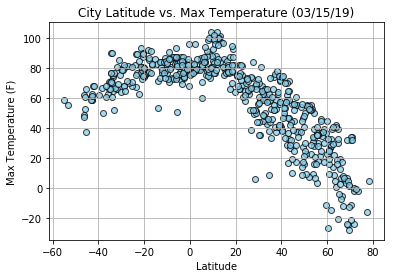

In [9]:
x_axis = main_cit_df["Lat"]
max_temp = main_cit_df["Max Temp"]
plt.scatter(x_axis, max_temp, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (03/15/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

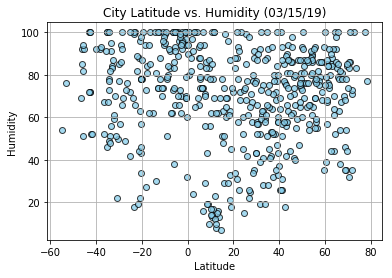

In [10]:
x_axis = main_cit_df["Lat"]
humidity = main_cit_df["Humidity"]
plt.scatter(x_axis, humidity, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (03/15/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

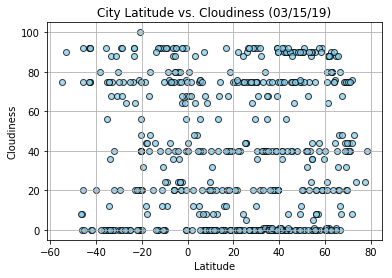

In [11]:
x_axis = main_cit_df["Lat"]
cloudy = main_cit_df["Cloudiness"]
plt.scatter(x_axis, cloudy, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (03/15/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

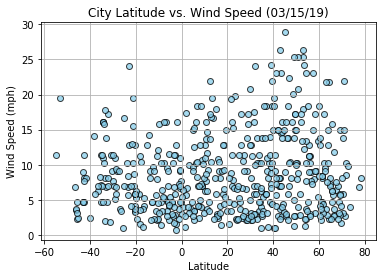

In [12]:
x_axis = main_cit_df["Lat"]
wind = main_cit_df["Wind Speed"]
plt.scatter(x_axis, wind, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (03/15/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

Observation 1:
The highest max temperature was observed around the equator, and the temperatures decreased the further the city was away from the equator.

Observation 2:
Overall there are more cities with humidity above 50% but it doesn’t look like there are trends that correlate with latitude.

Observation 3:
There doesn’t appear to be any trends relating to latitude for cloudiness, but I did notice a weird trend.  The cloudiness ratings seem to be based on a 0-100 scale.  I would expect there to be an even distribution along that axis.  A large amount of cloudiness data points are accumulating at 20, 40, 75, and 95.  I’m guessing that people use rounded familiar numbers like 20 and 40 more often than specific numbers like 37.
